## Birtweight Data 

This dataset contains information on new born babies and their parents.  

Data is located at [link](https://www.sheffield.ac.uk/mash/statistics/datasets)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Birthweight_reduced_kg_R.csv')
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


Variables in the data are as follows:


|     Name                 |     Variable                                           |     Data type    |
|--------------------------|--------------------------------------------------------|------------------|
|     ID                   |     Baby number                                        |                  |
|      length              |     Length of baby (cm)                                |     Scale        |
|      Birthweight         |     Weight of baby (kg)                                |     Scale        |
|      headcirumference    |     Head Circumference                                 |     Scale        |
|      Gestation           |     Gestation (weeks)                                  |     Scale        |
|      smoker              |     Mother smokes 1 = smoker 0 =   non-smoker          |      Binary      |
|      motherage           |     Maternal age                                       |     Scale        |
|      mnocig              |     Number of cigarettes smoked per day   by mother    |     Scale        |
|      mheight             |     Mothers height (cm)                                |      Scale       |
|      mppwt               |     Mothers pre-pregnancy weight (kg)                  |      Scale       |
|      fage                |     Father's age                                       |      Scale       |
|     fedyrs               |     Father’s years in education                        |     Scale        |
|      fnocig              |     Number of cigarettes smoked per day   by father    |     Scale        |
|      fheight             |     Father's height (cm)                               |      Scale       |
|      lowbwt              |     Low birth weight, 0 = No and 1 = yes               |      Binary      |
|     mage35               |     Mother over 35, 0 = No and 1 = yes                 |     Binary       |

 
Birthweight is the dependent variable. Lets first investigate this variable.

In [3]:
# Check if there is empty data
print(f"Number of null values: {sum( pd.isnull(df.Birthweight) )}")

# Check if data is None, NA, Inf etc.
print(f"Number of invalid values: {sum( pd.isna(df.Birthweight) )}")

Number of null values: 0
Number of invalid values: 0


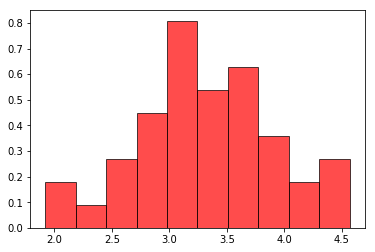

In [4]:
# Check the histogram of the data.
%matplotlib inline 

plt.hist( df.Birthweight, 10, density=True, facecolor='r', edgecolor='k', alpha=0.7 );
plt.gca().set_axisbelow(True)


plt.show()


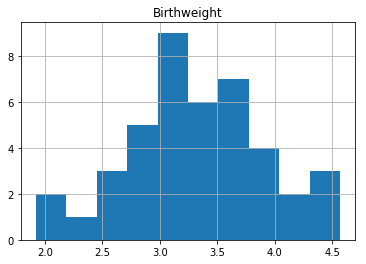

In [5]:
# Alternatively

df.hist(column='Birthweight');

Lets find quartiles of birthweight

In [3]:
q1 = df['Birthweight'].quantile(0.25)
q3 = df['Birthweight'].quantile(0.75)
median = df['Birthweight'].quantile(0.5)
iqr = q3-q1
print(f"q1: {q1}  q3: {q3}  iqr: {iqr}")

q1: 2.94  q3: 3.6475  iqr: 0.7075


Lets find the limits for outliers. 

Recall:
- lower limit for normal values: Q1-1.5IQR
- upper limit for normal values: Q3+1.5IQR


In [4]:
lower = q1-1.5*iqr
upper = q3+1.5*iqr 

print(f"range of normal data is: [{lower}-{upper}]")

range of normal data is: [1.87875-4.70875]


Lets list all values that could be outlier



In [5]:
flag = False
for i in range(df.shape[0]):
    if not (lower<df['Birthweight'][i]<upper):
        flag = True 
        print(df['Birthweight'])

if not flag:
    print("no outliers in the data")

no outliers in the data


Lets confirm with a boxplot

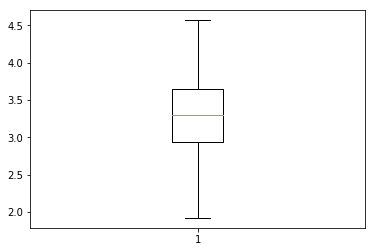

In [6]:
plt.boxplot(df.Birthweight);